In [3]:
#Import libraries for data manipulation and analysis.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [4]:
#Read the data into the jupiter notebook.
df=pd.read_csv(r"C:\Users\User\Downloads\social media trends data.csv")

In [5]:
#drop the unnamed columns.
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace= True)
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning.,Negative,2023-01-15 8:45:00,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [6]:
#Manualy check for missing values and the datatypes of the columns .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       732 non-null    object
 1   Sentiment  732 non-null    object
 2   Timestamp  732 non-null    object
 3   User       732 non-null    object
 4   Platform   732 non-null    object
 5   Hashtags   732 non-null    object
 6   Retweets   732 non-null    int64 
 7   Likes      732 non-null    int64 
 8   Country    732 non-null    object
 9   Year       732 non-null    int64 
 10  Month      732 non-null    int64 
 11  Day        732 non-null    int64 
 12  Hour       732 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 74.5+ KB


In [7]:
#Dropping duplicate data
df=df.drop_duplicates()

In [17]:
df.head(2)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning.,Negative,2023-01-15 8:45:00,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8


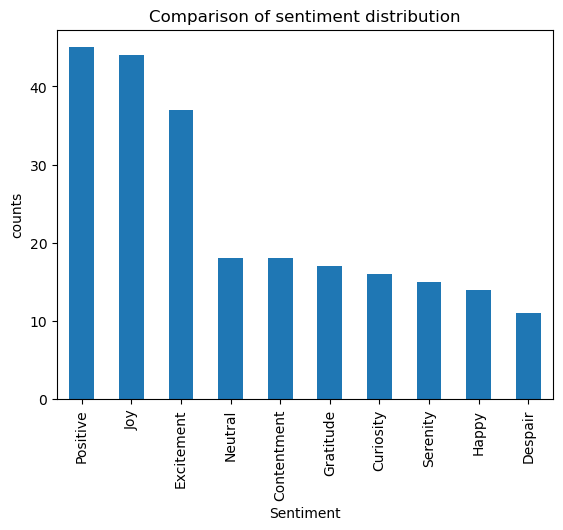

In [13]:
sentiment = df["Sentiment"].value_counts().head(10).plot(kind="bar")
plt.title("Comparison of sentiment distribution")
plt.xlabel("Sentiment")
plt.ylabel("counts")
plt.show();

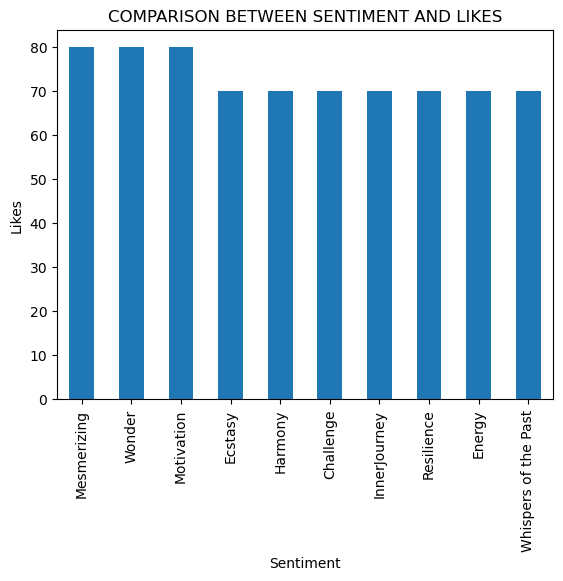

In [43]:
data=df.groupby("Sentiment")["Likes"].median().sort_values(ascending=False).head(10)
data.plot(kind="bar",xlabel="Sentiment",ylabel="Likes")
plt.title("COMPARISON BETWEEN SENTIMENT AND LIKES")
plt.show();

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       711 non-null    object
 1   Sentiment  711 non-null    object
 2   Timestamp  711 non-null    object
 3   User       711 non-null    object
 4   Platform   711 non-null    object
 5   Hashtags   711 non-null    object
 6   Retweets   711 non-null    int64 
 7   Likes      711 non-null    int64 
 8   Country    711 non-null    object
 9   Year       711 non-null    int64 
 10  Month      711 non-null    int64 
 11  Day        711 non-null    int64 
 12  Hour       711 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 77.8+ KB


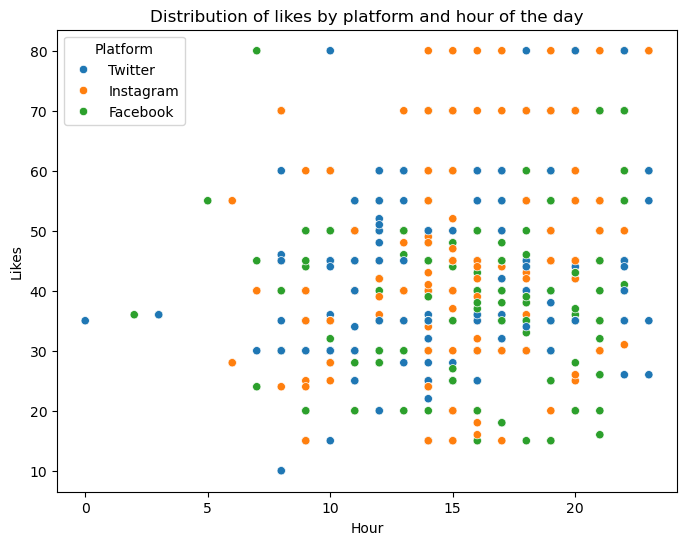

In [29]:
##A scatter plot to show distribution of likes by platform and hour of the day
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'Hour', y = 'Likes',hue = "Platform")
plt.title("Distribution of likes by platform and hour of the day")
plt.xlabel("Hour")
plt.ylabel("Likes")
plt.show();

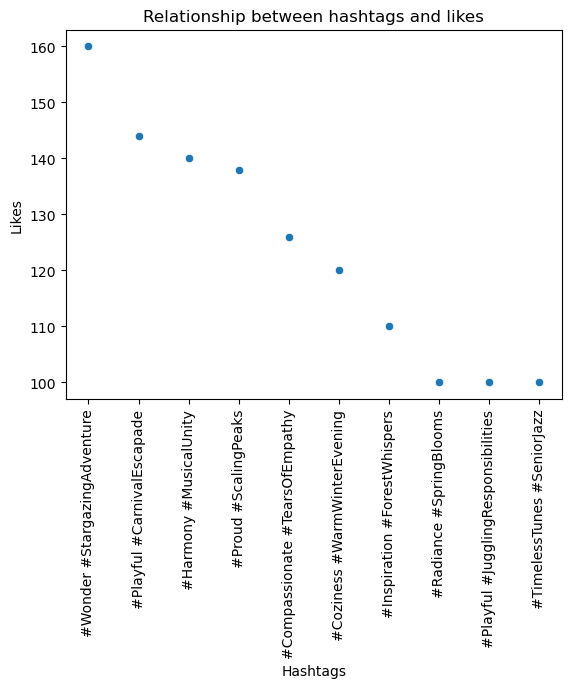

In [44]:
Relation =df.groupby("Hashtags")["Likes"].sum().sort_values(ascending=False).head(10).to_frame()
sns.scatterplot(x="Hashtags",y="Likes",data=Relation)
plt.title("Relationship between hashtags and likes")
plt.xlabel("Hashtags")
plt.ylabel("Likes")
plt.xticks(rotation=90)
plt.show();

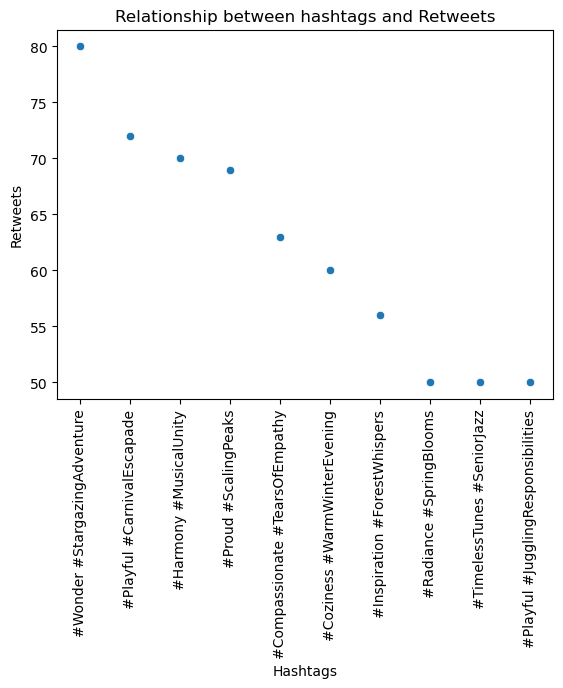

In [45]:
Relation =df.groupby("Hashtags")["Retweets"].sum().sort_values(ascending=False).head(10).to_frame()
sns.scatterplot(x="Hashtags",y="Retweets",data=Relation)
plt.title("Relationship between hashtags and Retweets")
plt.xlabel("Hashtags")
plt.ylabel("Retweets")
plt.xticks(rotation=90)
plt.show();

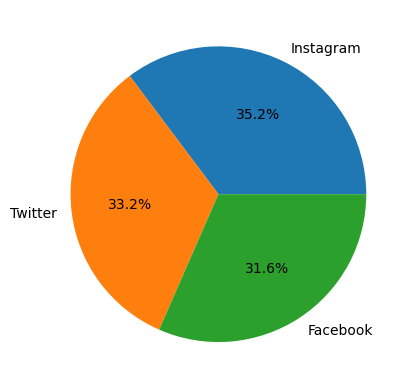

In [46]:
#Which platform has the highest percentage use
counts=df["Platform"].value_counts()
counts
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=0)
plt.show;

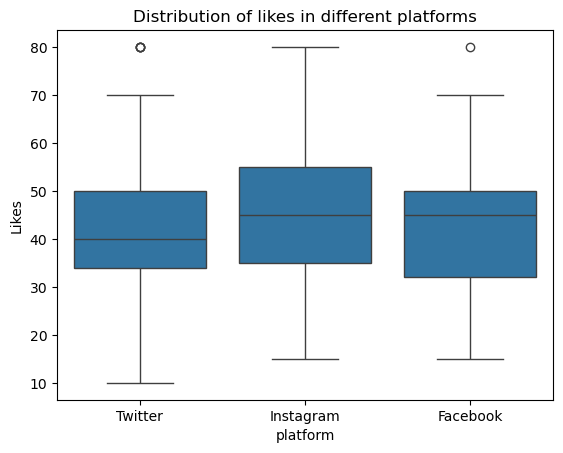

In [47]:
#platform with highest average likes.
sns.boxplot(x="Platform",y="Likes",data=df)
plt.xlabel("platform")
plt.ylabel("Likes")
plt.title("Distribution of likes in different platforms")
plt.show();

Country
USA          184
UK           140
Canada       132
Australia     70
India         68
Brazil        17
France        16
Japan         15
Germany       14
Italy         11
Name: count, dtype: int64


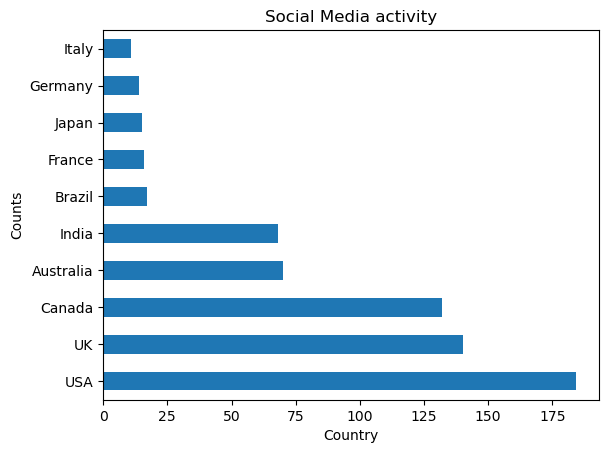

In [39]:
##A bargraph to compare the social media activity by country
data = df["Country"].value_counts().head(10)
print(data)
data.plot(kind="barh")
plt.title("Social Media activity")
plt.xlabel("Country")
plt.ylabel("Counts")
plt.show();

Axes(0.125,0.11;0.775x0.77)


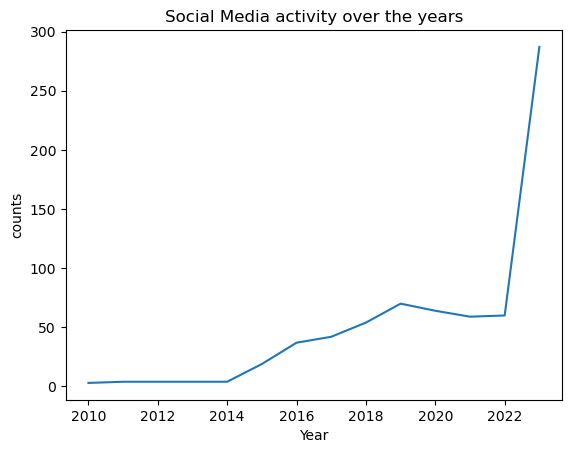

In [75]:
#Social Media activity over the years.
year = df["Year"].value_counts().sort_index().plot(kind="line")
print(year)
plt.title("Social Media activity over the years")
plt.ylabel("counts")
plt.xlabel("Year")
plt.show();